In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

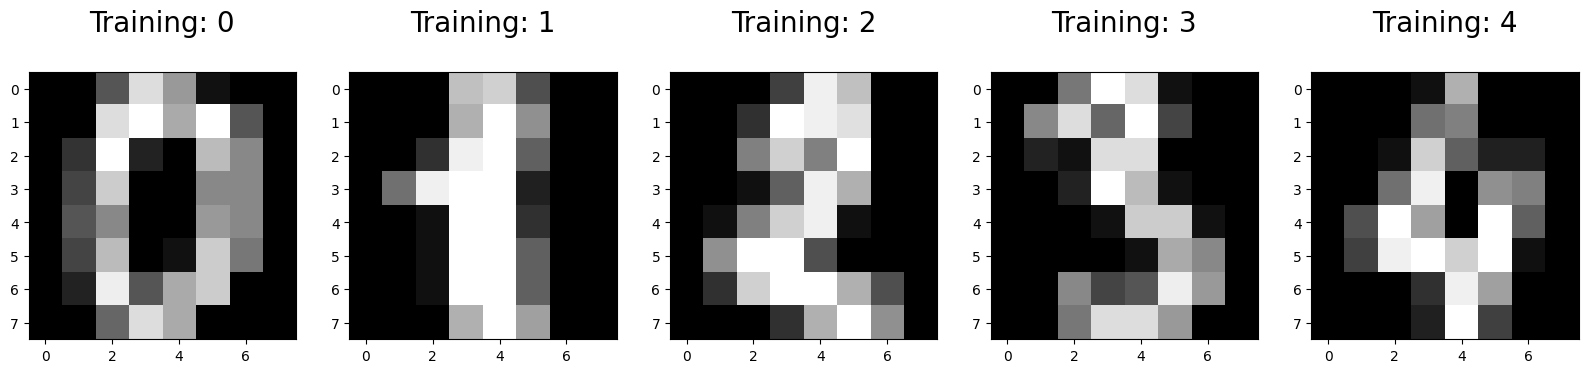

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
# The train set is used to train the machine learning model, allowing the model to learn patterns from the data.
# The test set is used to evaluate the performance of the model on unseen data, ensuring that the model generalizes well to new data.

In [6]:
# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Evaluate the model
y_pred = rf.predict(X_test)

In [8]:
# Choosing 'n_estimators' parameter to tune
# 'n_estimators' is the number of trees in the forest. Increasing the number of trees generally improves performance but also increases computational cost.

In [9]:
# Select 'n_estimators' value to test
# Choosing 100 for 'n_estimators' to balance between performance improvement and computational efficiency.
rf_tuned = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)

In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[42  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  1  0  0  2  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  1  0  0 36  0]
 [ 0  0  0  1  0  1  0  1  0 45]]


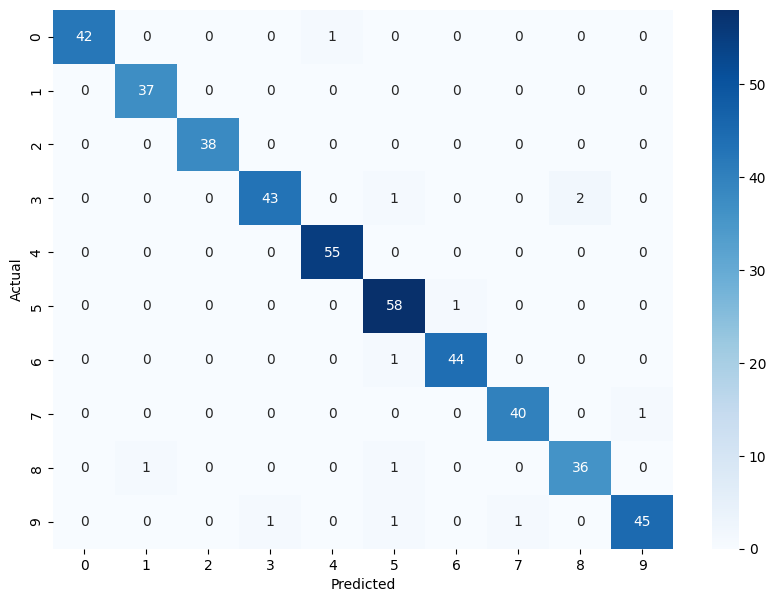

In [11]:
# Analyse confusion matrix to determine which classes the model struggles with the most
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [12]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned, average="macro")
recall = recall_score(y_test, y_pred_tuned, average="macro")
f1 = f1_score(y_test, y_pred_tuned, average="macro")

In [13]:
# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9733333333333334
Precision: 0.974760049040283
Recall: 0.9732833597127761
F1-Score: 0.9738328956719883
